In [40]:
import os
import sys
import pandas as pd
import numpy as np
# the models dir contains tf_gbt.py
sys.path.append(os.path.join(os.path.abspath(''), "../models"))
from tf_gbt import GradientBoostedTrees

In [41]:
def split_dataset(df, test_ratio=0.20):
  test_indices = np.random.rand(len(df)) < test_ratio
  return df[~test_indices], df[test_indices]

### Model Configurations and Datasets

We wil declare configurations for the model 

In [42]:
data_path = "../data/20231119"

output_path = "../submissions/20231119"

label = 'Transported'

In [43]:
## load train and validation dataset

train_df = pd.read_csv(os.path.join(data_path, "train_encoded.csv"))
test_df = pd.read_csv(os.path.join(data_path, "test_encoded.csv"))

train_df, valid_df = split_dataset(train_df)

In [44]:
select_features = list(train_df.columns)
# excluded_features =  ['PassengerId','Spa','HomePlanet_Mars']
# [select_features.remove(feat) for feat in excluded_features]
select_features.remove('PassengerId')

[None, None, None]

### Running TensorFlow Gradient Boosted Trees experiments

We will first instantiate the tensorflow GBT model using the predefined configurations and datasets. 

An autotuner will be use selecting the most optimal hyperparameters

In [45]:
gbt = GradientBoostedTrees(train_df=train_df, valid_df=valid_df, test_df=test_df,label=label)
gbt.feature_selection(selected_features=select_features)
gbt.create_tuner(num_trials=50)
gbt.create_gbt_model()

============ Instantiating GBT class ============
============ Pruning Features ============
============ Creating RandomSearch Tuner ============
============ Instantiating GBT model ============


Use /var/folders/g4/mj9t8ccd7bn74b0c25x8xjth0000gn/T/tmp5w_1qb8k as temporary training directory


[WARNING 23-11-19 14:37:17.7578 +08 gradient_boosted_trees.cc:1830] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 23-11-19 14:37:17.7579 +08 gradient_boosted_trees.cc:1841] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 23-11-19 14:37:17.7579 +08 gradient_boosted_trees.cc:1855] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


In [46]:
# run experiment
gbt_model_history = gbt.run_experiments()
print(f"Train Model Accuracy: {gbt_model_history.history['accuracy']}")

# evaluate
gbt_model_evaluation, gbt_model_metrics, gbt_model_classification_report = gbt.evaluate()

============ Running Experiment ============
Reading training dataset...
Training tensor examples:
Features: {'CryoSleep': <tf.Tensor 'data:0' shape=(None,) dtype=int64>, 'VIP': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'RoomService': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'FoodCourt': <tf.Tensor 'data_3:0' shape=(None,) dtype=float64>, 'ShoppingMall': <tf.Tensor 'data_4:0' shape=(None,) dtype=float64>, 'VRDeck': <tf.Tensor 'data_5:0' shape=(None,) dtype=float64>, 'IsAlone': <tf.Tensor 'data_6:0' shape=(None,) dtype=int64>, 'HomePlanet_Earth': <tf.Tensor 'data_7:0' shape=(None,) dtype=int64>, 'HomePlanet_Europa': <tf.Tensor 'data_8:0' shape=(None,) dtype=int64>, 'Destination_55_Cancri_e': <tf.Tensor 'data_9:0' shape=(None,) dtype=int64>, 'Destination_PSO_J318.5-22': <tf.Tensor 'data_10:0' shape=(None,) dtype=int64>, 'Destination_TRAPPIST-1e': <tf.Tensor 'data_11:0' shape=(None,) dtype=int64>, 'CabinDeck_A': <tf.Tensor 'data_12:0' shape=(None,) dtype=int64>, 'CabinD

[INFO 23-11-19 14:37:18.2022 +08 kernel.cc:773] Start Yggdrasil model training
[INFO 23-11-19 14:37:18.2022 +08 kernel.cc:774] Collect training examples
[INFO 23-11-19 14:37:18.2023 +08 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 23-11-19 14:37:18.2024 +08 kernel.cc:393] Number of batches: 7
[INFO 23-11-19 14:37:18.2024 +08 kernel.cc:394] Number of examples: 6975
[INFO 23-11-19 14:37:18.2040 +08 kernel.cc:794] Training dataset:
Number of records: 6975
Number of columns: 31

Number of columns by type:
	NUMERICAL: 30 (96.7742%)
	CATEGORICAL: 1 (3.22581%)

Columns:

NUMERICAL: 30 (96.7742%)
	0: "AgeGroup_0" NUMERICAL mean:0.0775627 min:0 max:1 sd

Model trained in 0:11:01.559218
Compiling model...
Model compiled.
Train Model Accuracy: [0.7900874614715576]
============ Evaluating ============
2/2 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.7893


2/2 [==============================] - 0s 4ms/step


Accuracy metric using validation datasets for evaluation

In [47]:
evaluation_accuracy = gbt_model_evaluation['accuracy']
print(f"Test accuracy with the TF-DF hyper-parameter tuner: {evaluation_accuracy:.4f}")

Test accuracy with the TF-DF hyper-parameter tuner: 0.7893


Using sklearn classification report to output common metrics

In [48]:
print(gbt_model_classification_report)

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       836
           1       0.79      0.80      0.80       882

    accuracy                           0.79      1718
   macro avg       0.79      0.79      0.79      1718
weighted avg       0.79      0.79      0.79      1718



In [49]:
gbt_model_predictions, gbt_model_output = gbt.predict()

============ Predicting ============


5/5 [==============================] - 0s 6ms/step
Model: "gradient_boosted_trees_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "GRADIENT_BOOSTED_TREES"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (30):
	AgeGroup_0
	AgeGroup_1
	AgeGroup_2
	AgeGroup_3
	AgeGroup_4
	AgeGroup_5
	AgeGroup_6
	AgeGroup_7
	CabinDeck_A
	CabinDeck_B
	CabinDeck_C
	CabinDeck_D
	CabinDeck_E
	CabinDeck_F
	CabinDeck_G
	CabinDeck_T
	CabinSide_P
	CabinSide_S
	CryoSleep
	Destination_55_Cancri_e
	Destination_PSO_J318.5-22
	Destination_TRAPPIST-1e
	FoodCourt
	HomePlanet_Earth
	HomePlanet_Europa
	IsAlone
	RoomService
	ShoppingMall
	VIP
	VRDeck

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.                "AgeGroup_0"  0.361591 ##############

### Model Visualisations

Training Logs

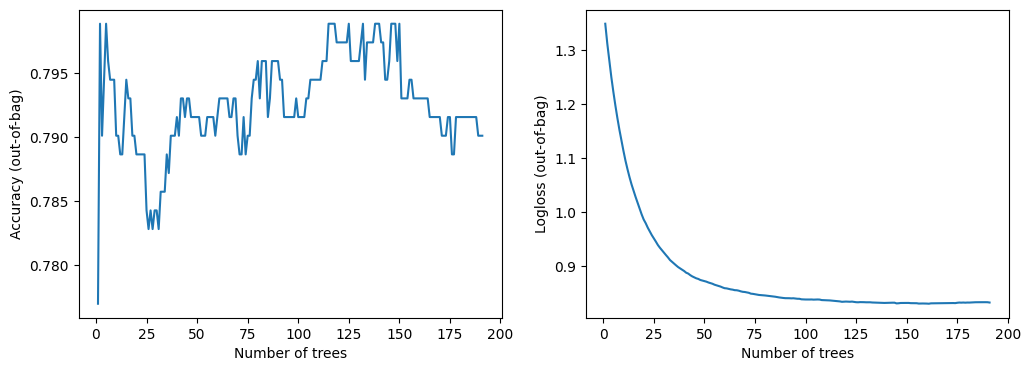

In [50]:
# training logs
gbt_model_training_logs = gbt.plot_training_logs()

Tuning Logs

score                                            -0.830525
evaluation_time                                 439.391268
best                                                  True
split_axis                                  SPARSE_OBLIQUE
sparse_oblique_projection_density_factor               4.0
sparse_oblique_normalization                          NONE
sparse_oblique_weights                          CONTINUOUS
categorical_algorithm                               RANDOM
growing_strategy                                     LOCAL
max_depth                                              4.0
sampling_method                                     RANDOM
subsample                                              1.0
shrinkage                                             0.05
min_examples                                            10
use_hessian_gain                                      true
num_candidate_attributes_ratio                         0.5
max_num_nodes                                          N

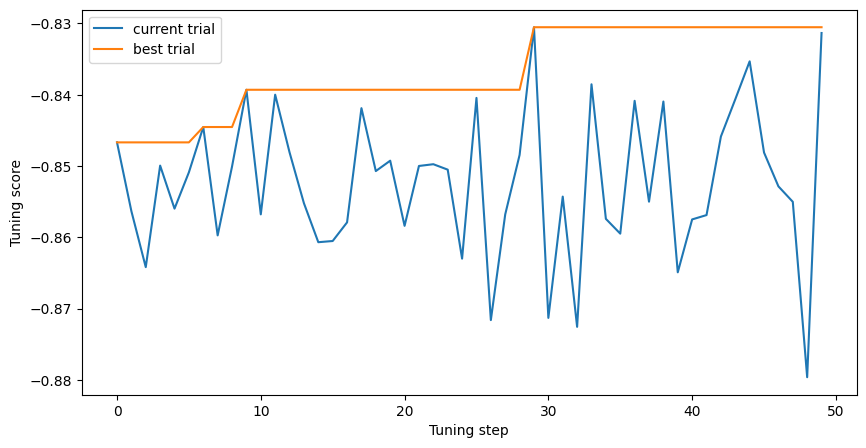

In [51]:
# tuning logs
gbt_model_tuning_logs = gbt.plot_tuning_logs()

Variable Importance

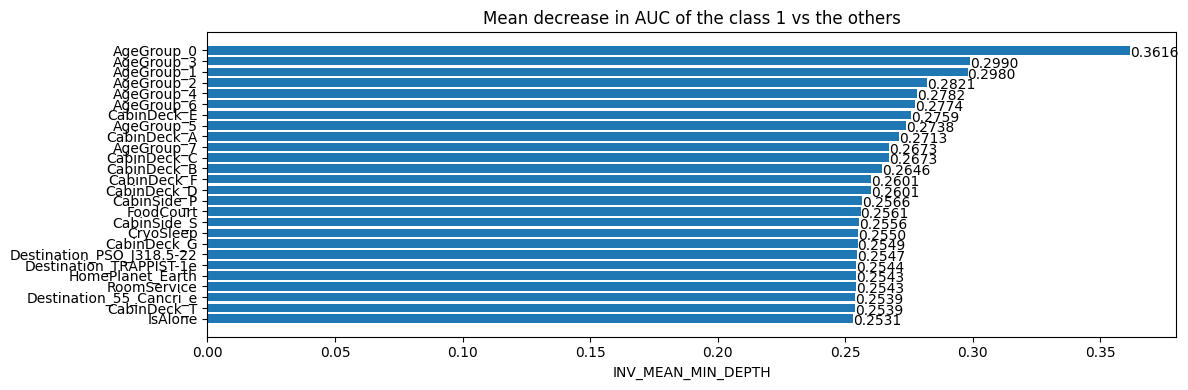

In [52]:
# variable importance
gbt_model_variable_importances = gbt.plot_variable_importances()

### Export output as csv for submission

In [53]:
os.makedirs(output_path, exist_ok=True) 
gbt_model_output.to_csv(os.path.join(output_path, "tf_gbt_20231119_2.csv"),index=False)